# **Week 2: Numerical Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will explore basic summary statistics for numerical data and demonstrate how to compute them in R. If you are not familiar with R programming, please take some time to review [Week 1](https://github.com/ArwenNugteren/MXB107-Notebooks/blob/main/notebooks/Week_1.ipynb) content.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [ ]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/ArwenNugteren/MXB107-Notebooks")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr

Loading required package: jpeg

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘jpeg’”
I

**Do not modify the following**

In [ ]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "IRdisplay", "png") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
  expect_true(exists("Mode"))
  expect_true(exists("FDbinning"))
  expect_true(exists("ModeBinMidpoint"))
  expect_true(exists("empiricalRuleGaussian"))
  expect_true(exists("chebyshevRule"))
  expect_true(exists("rangeBasedSD"))
  expect_true(exists("IQRBasedSD"))
  expect_true(exists("boxPlotDescribe"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not




Test passed with 1 success 🥇.
Test passed with 10 successes 😀.


# Why do we need data summaries?
Let's consider a coffee shop on campus, where they want to know how many coffees students drink each day. They survey 100 students to ask how many cups of coffee they drink each day on average.

Discuss with the 2-3 people next to you some ways you could summarise the data, or the sorts of trends and patterns you expect.


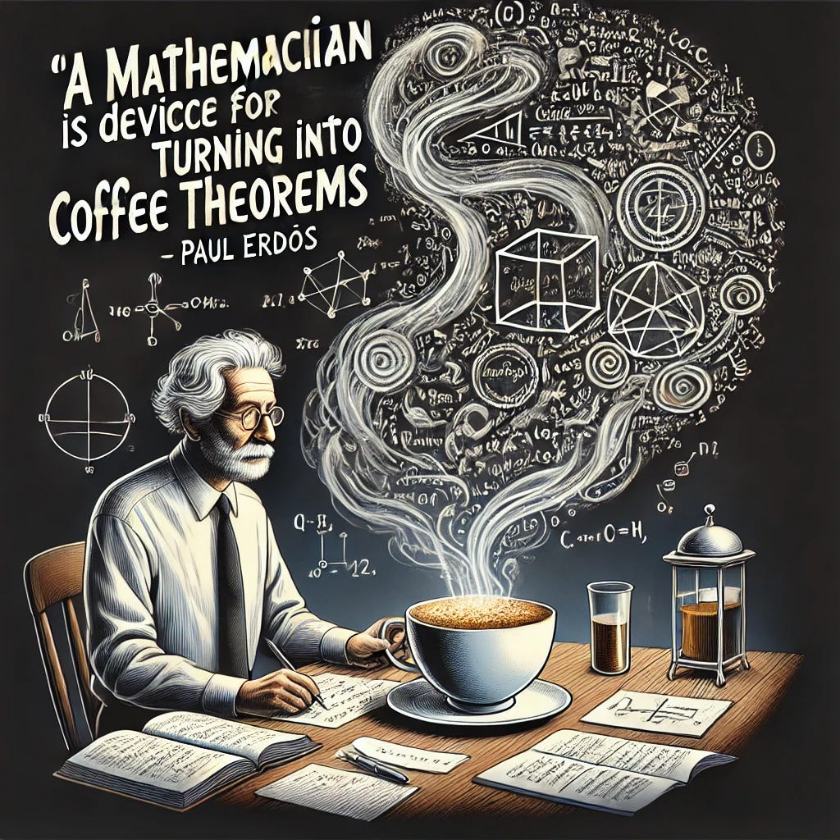

In [ ]:
img = readJPEG("figures/meme_wk2.jpg")
grid.raster(img)


## **Statistical Inference**

Summarising trends and patterns in data is the core of statistical inference — using limited data to learn about a much larger group. Today we focus on analysing and comparing data using numerical summaries:

- Measures of central tendency — statistics that describe the center or typical value of the data, eg. mean, median, mode. We can answer questions such as how much coffee do we expect QUT students to drink per day on average?
- Measures of variability such as variance, standard deviation, interquartile range describe how much variability or dispersion exists within the data (e.g., How much does coffee drunk per day vary between different students?)
- Measures of shape (skewness) describe the distribution of data points. (e.g. Are there students with unusually low or high coffee consumption compared to their peers?)

Today we'll look at calculating some of these measures by hand, and how to plot them visually.

## **Measures of Central Tendency**

## Mean

### Exercise 1
One student participating in the coffee study recorded the number of cups of coffee that they drank in a fortnight as: 1, 4, 2, 2, 3, 1, 4, 0, 9, 1, 3, 2, 4, 1.

Find the mean number of cups of coffee they drank.



<details>
<summary>▶️ Click to show the solution</summary>

$\bar{x} = \frac1{14} (1 + 4 + 2 + 2+ 3+ 1+ 4+ 0+ 9+ 1+ 3+ 2+ 4+ 1) \approx \frac{37}{14}  \approx 2.64$
</details>

## **Median**

### Exercise 2
Calculate the median coffee drunk per day by the student above



<details>
<summary>▶️ Click to show the solution</summary>

The sorted dataset is: 0,1,1,1,1,2,2,2,3,3,4,4,4,9. The middle values (7 and 8) are both 2, so our median is $\frac{2+2}2 = 2$.
</details>

## **Mode**


### Exercise 3
What is the mode or modes of the student's coffee consumption?



<details>
<summary>▶️ Click to show the solution</summary>

The sorted dataset from before is : 0,1,1,1,1,2,2,2,3,3,4,4,4,9. We can see that 0 appears once, 1 appears four times, 2 appears three times, 4 appears three times, and 9 appears once. 1 is the most commonly appearing, so it is the mode. This dataset is *unimodal*.
</details>

## **Quantiles and the Interquartile Range (IQR)**

*Run the cell below to see a labelled example of a boxplot with important quartiles marked.*


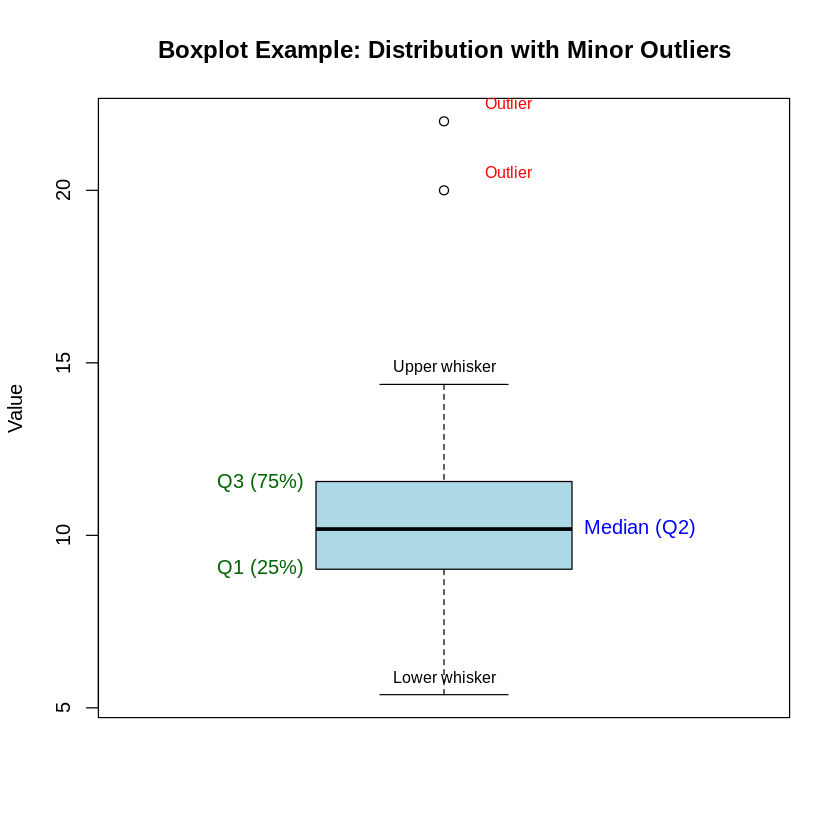

In [ ]:
boxPlotDescribe()

### Exercise 4
Calculate the five-number summary for the coffee dataset and sketch a boxplot.



<details>
<summary>▶️ Click to show the solution</summary>

The sorted dataset from before is : 0,1,1,1,1,2,2,2,3,3,4,4,4,9.

The minimum value is 0.

The fourth value corresponds to the 25% quantile, and it is 1.

The median is 2.

The eleventh value corresponds to the 75% quantile, and it is 4.

The maximum value is 9.

So, our five-number summary is: 0, 1, 2, 4, 9.
</details>

## **Measure of Variability**


## The Range


### Example
Calculate the range of the coffee dataset.


<details>
<summary>▶️ Click to show the solution</summary>

The maximum value is 9, and the minimum is 0, so the range is 9 - 0 = 9.

As we can see, the range is highly affected by the outlying value of 9.
</details>

## Inter-Quartile Range (IQR)


### Exercise 5
Calculate the IQR of the coffee data.



<details>
<summary>▶️ Click to show the solution</summary>

The sorted dataset from before is : 0,1,1,1,1,2,2,2,3,3,4,4,4,9.

The quantiles Q3 and Q1 were 4 and 1, so our IQR is 3.
</details>

## Sample Variance and Standard Deviation


### Exercise 6
Calculate the standard deviation of the coffee data.
For fun, calculate it again without the outlying value of 9.



<details>
<summary>▶️ Click to show the solution</summary>

$$s^2 = \frac1{13} \big((1-2.642...)^2 + (4-2.642...)^2 + ... + (1-2.642...)^2\big) \approx \frac{65.214....}{13}  \approx 5.02$$

Taking the square root gives us $s = \sqrt{5.02...} = 2.24$.

When we exclude the outlying value of 9, the standard deviation becomes only 1.34, which is much smaller. We can see that variance and standard deviation are strongly affected by outliers, due to squaring the distance from the mean.

</details>

## Z-scores and relative rankings

## Exercise 7
Let's say we got the results of our survey before. QUT coffee consumption was found to have a mean of $\mu_{QUT} = 1.6$ cups per day, with a standard deviation of $\sigma_{QUT} = 0.4$ cups per day. We also compared the study to UQ students, and they have a mean coffee per day of $\mu_{UQ} = 2.1$ cups and standard deviation $\sigma_{UQ} = 0.7$ cups per day.

Using Z-scores, calculate which situation is rarer: a QUT student drinking 3 cups of coffee, or a UQ student drinking 0 cups of coffee.





<details>
<summary>▶️ Click to show the solution</summary>

For the QUT student, we calculate $Z_{QUT} = \frac{3-1.6}{0.4} = 3.5$.

For the UQ student, we calculate $Z_{UQ} = \frac{0-2.1}{0.7} = -3$.

We compare the absolute values, and see that |3.5| = 3.5 is larger than |-3| = 3, so it is more unlikely for a QUT student to drink 3 cups of coffee in a day than for a UQ student to drink 0 coffees in a day.

Z-scores are useful for comapring data with different means and standard deviations.

</details>

# Practice questions
*These can be completed by yourself, or working in pairs or small groups. Tutors will be walking around the room and are happy to help answer any questions you may have!*

## Practice Question 1
The ages (in years) of members of a study group are:
18, 21, 22, 19, 20, 23, 20

a) Find the median age.

b) Explain why the median might be preferred over the mean if the last student in the group is actually 45 years old, not 20 years old.



<details>
<summary>▶️ Click to show the solution</summary>

a) The median age is 20 years old.

b) If the last student was 45, the mean of the data would be 24 (older than 5 out of the 6 students in the group). Without further context, it could appear that the age of this group of students was split evenly around 24, instead of in the 18-23 range.

</details>

## Practice Question 2
The following are the number of hours 10 students studied last week:
0, 5, 8, 4, 7, 10, 3, 6, 9, 5

a) Compute the range.

b) Compute the IQR.

c) Give one reason why the IQR might be better than the range at describing the variability in this dataset.



<details>
<summary>▶️ Click to show the solution</summary>

a) The range is given by 10 - 0 = 10.

b) The sorted dataset is 0, 3, 4, 5, 5, 6, 7, 7, 8, 9, 10.
As there are 10 values, Q1 is given by the 3rd value, which is 4 and Q3 is the 8th value, which is 8. This gives an IQR of 8 - 4 = 4.

c) One reason is that using the range doesn't indicate how study hours are distributed over the group of students, and can be overly affected by outliers (like the value of 0).  

</details>

## Practice Question 3
Two classrooms have the same mean test score of 75%.

Classroom A: Scores are all tightly clustered between 72% and 78%.
Classroom B: Scores range from 40% to 98%.

a) Which class would you expect to have the larger standard deviation?

b) Why can the standard deviation convey more information here than the range alone?



<details>
<summary>▶️ Click to show the solution</summary>

a) Classroom B will likely have the larger standard deviation, as some values are far from the mean, while all the values in Classroom A are very close to the mean. *Note: we say it's "likely" that classroom B has a larger standard deviation, but you could devise an example where classroom B has only the two outliers, and a very large number of students who scored almost exactly the mean, while classroom A had very few students. In practice, this would be unlikely to happen.*

b) Only looking at two values (the maximum and minimum) can exaggerate the spread of the data if these were outliers. If we knew the standard deviation for each class, we'd be able to comment more precisely about the typical consistency of each class.

</details>

## Practice Question 4
The number of errors in drafts of essays from two writing groups are:

Group A: 3, 4, 4, 5, 6, 4, 5

Group B: 1, 2, 10, 0, 3, 12, 1

Compute and compare:

a) Mean

b) Median

c) IQR

d) Which group is more consistent, and why?



<details>
<summary>▶️ Click to show the solution</summary>
The sorted datasets are:

Group A: 3,4,4,4,5,5,6

Group B: 0,1,1,2,3,10,12

a) Group A: $\frac{3 + 4 + \ldots + 5}{7} = \frac{31}7 \approx 4.43$

Group B: $\frac{1 + \ldots + 1}{7} = \frac{29}{7} \approx 4.14$

b) Group A median: 4

Group B median: 2

c) Group A IQR: 1

Group B IQR: 10

d) Group A has much more consistent writing performance as their IQR is only 1, while Group B has a large spread with an IQR of 10. While Group B has a lower mean number of errors, there are some students in the group making a very large number of errors.

</details>

# 10-minute break!

# R coding

### **Dataset**

We will load a simulated dataset with 4 variables, each having 100 observations, all of which have a different number of outliers. The non-outlier observations are generated from a standard Gaussian (also referred to as "normal" or "bell-shaped") distribution that has a mean of 0 and a variance of 1 (so the standard deviation is also 1). Our goal in this section is to calculate measures of central tendency and variance and plot them.

In [ ]:
# the read.csv() command loads a comma-separated value (csv) file into R so that we can use it
# we assign it to the variable X
X = read.csv("./datasets/centraltendency")

In [ ]:
# we want to get some information about the sort of dataset X is
# the command str(X) will tell us some information about the names of the columns, the type of variables and number of observations
str(X)

'data.frame':	100 obs. of  4 variables:
 $ G0        : num  -1.862 1.14 0.318 1.4 2.238 ...
 $ G0_oult25 : num  -1.538 1 1.891 0.648 0.616 ...
 $ G0_oult50 : num  0.8693 0.0268 0.9962 0.4103 1.0906 ...
 $ G0_oult100: num  -1.675 -0.447 0.51 -0.829 0.607 ...


First, we will use boxplots to visualise the data and get an overview of its distribution and potential outliers. We will return later to explain in detail what the various components of a boxplot represent.

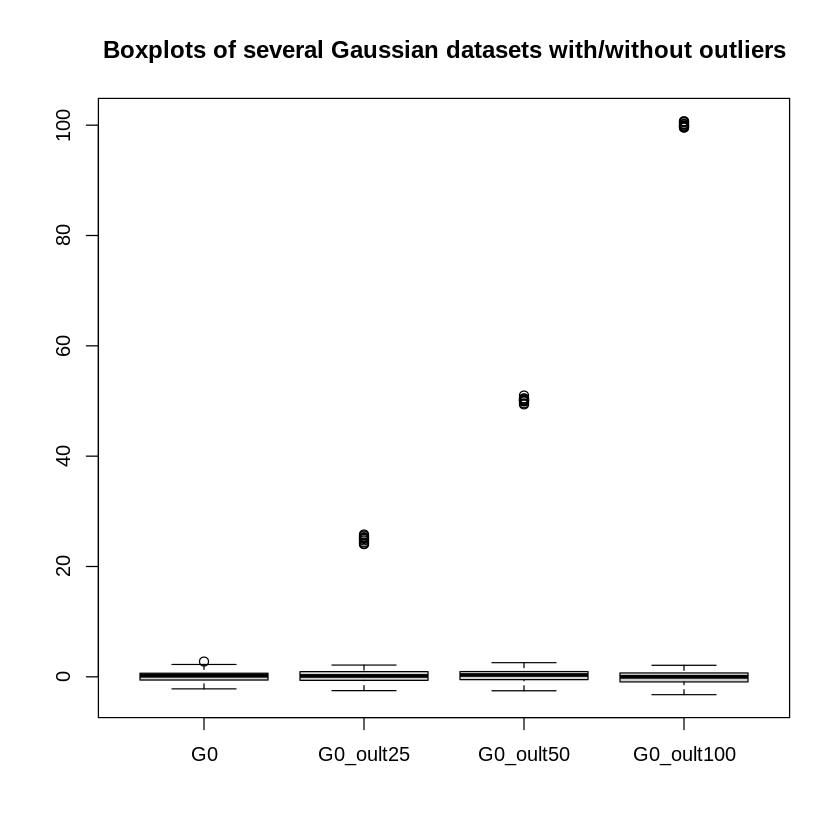

In [ ]:
# the R command boxplot() will produce a box plot
# we need to specify the data for it to plot (this is our variable X)
# we can also give the plot a title using the argument main = ""
# titles or labels always need to be in quotation marks
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

#### **R Examples**

In R, the arithmetic mean can be calculated using the built-in `mean()` function. This function takes a numeric vector as input and returns the average of its elements.

In [ ]:
# since X is a dataframe with multiple columns, we calculate the mean of each column by using the $ to select a particular column and treat it is a numeric vector
# if you try mean(X), it'll return an error, as the mean() function can only take in a single column or set of data at once

mean(X$G0)
mean(X$G0_oult25)
mean(X$G0_oult50)
mean(X$G0_oult100)

[1] 0.1133176

[1] 2.497787

[1] 5.108938

[1] 9.80451

We can also calculate the median using the built-in `median()` function.

In [ ]:
median(X$G0)
median(X$G0_oult25)
median(X$G0_oult50)
median(X$G0_oult100)

[1] 0.1909209

[1] 0.1565388

[1] 0.3309661

[1] -0.003256633

## Discuss!
Which measure of centrality seems better for this dataset? What are the pros and cons of both the mean and median?


Note: There is no built-in `mode()` function in R, so we'll leave that for now.

### Challenge exercise!
See if you can plot the boxplot with means and medians displayed as well.

Hint: you can plot individual points using the function `points()`.

<details>
<summary>▶️ Click to show the solution</summary>

```r
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

means = c(mean(X$G0), mean(X$G0_oult25), mean(X$G0_oult50), mean(X$G0_oult100))
medians = c(median(X$G0), median(X$G0_oult25), median(X$G0_oult50), median(X$G0_oult100))

# note: pch determines the appearance of the plotted points
# you can try changing the numbers if you want, to see what happens
points(1:4, means, pch = 19, col = "red")
points(1:4, medians, pch = 15, col = "blue")

# Add legend
legend("topleft", legend = c("Mean", "Median"),
        col = c("red", "blue"), pch = c(19,15))
```

</details>

## **R Examples**
In R, the sample variance can be calculated using the built-in `var()` function. This function takes a numeric vector as input and returns the sample variance.

In [ ]:
var(X$G0)
var(X$G0_oult25)
var(X$G0_oult50)
var(X$G0_oult100)

[1] 0.9530613

[1] 57.33893

[1] 228.4473

[1] 915.9539

What do you notice? Do these values seem reflective of the spread you see in the dataset?

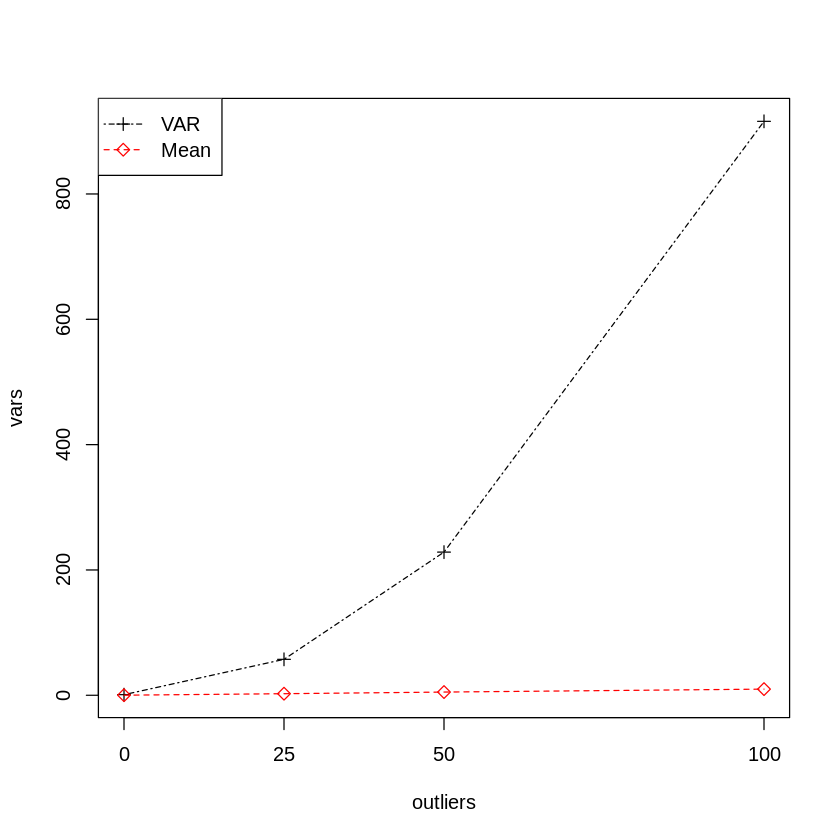

In [ ]:
# instead of calculating every mean and variance separately
# we can use apply() to calculate the mean or variance over each row (1) or column (2)
# the result of apply() is a vector with one entry per column
means = apply(X,2,mean)
vars = apply(X,2,var)

# for scaling the plot
outliers = c(0,25,50,100)

# the following code plots the points and makes it look nice with the extra arguments
# don't worry about understanding all the parts, just run it to see what it looks like
plot(outliers, vars, type = "l", lty = 4, col = "black", xaxt = "n")

points(outliers, vars,pch = 3, col = "black")
points(outliers, means,pch = 5, col = "red")
lines(outliers, means, type = "l", lty = 2, col = "red")

axis(side = 1, at = c(0, 25, 50, 100))

legend("topleft", legend = c("variance", "mean"), pch = c(3,5), col = c("black", "red"), lty = c(4,2))


### **R Examples**
In R, the sample standard deviation can be calculated using the built-in `sd()` function. This function takes a numeric vector as input and returns the sample standard deviation.

In [ ]:
sd(X$G0)
sd(X$G0_oult25)
sd(X$G0_oult50)
sd(X$G0_oult100)

[1] 0.9762486

[1] 7.572247

[1] 15.11447

[1] 30.26473

## Discuss!
Is the standard deviation better than the variance at describing the dispersion? Why or why not?

### Challenge question
Can you modify the above plot to display the standard deviations as well?

<details>
<summary>▶️ Click to show the solution</summary>

```r
means = apply(X,2,mean)
vars = apply(X,2,var)
sds = apply(X,2,sd)

outliers = c(0,25,50,100)

plot(outliers, vars, type = "l", lty = 4, col = "black", xaxt = "n")
points(outliers, vars,pch = 3, col = "black")
axis(side = 1, at = c(0, 25, 50, 100))

lines(outliers, sds, type = "l", lty = 3, col = "blue", xaxt = "n")
points(outlVals, sds,pch = 4, col = "blue")

lines(outliers, means, type = "l", lty = 2, col = "red")
points(outliers, means,pch = 5, col = "red")

legend("topleft", legend = c("variance", "sd", "mean"), pch = c(3,4,5), col = c("black", "blue", "red"), lty = c(4,3,2))
```

</details>

## **The Empirical Rule For Interpreting Standard Deviation**

If the data look somewhat close to the **normal** distribution (roughly symmetric, unimodal, and not heavy-tailed) then in general:

- 68% of the observations will fall within one standard deviation of the mean

- 95% of the observations will fall within two standard deviations of the mean

- 99.7% of the observations will fall within three standard deviations of the mean.

### **Range-based Estimate of Standard Deviation**

We can use the **empirical rule** to provide a rough approximation of the standard deviation. We assume approximately 95% of the data falls within **±2 standard deviations** of the mean (empirical rule). Then we also assume "most" of the dataset is contained within ±2 SD, and so we can approximate the standard deviation $s$ by:

$$
\tilde{s} = \frac{\text{range}}{4}
$$

### Discussion question
When do you think this range-based estimate is likely to work well? Can you think of examples where it might fail?


#### **R exercise**

Compute the range-based estimate of standard deviation of `X`. The commands `max()` and `min()` may help you.

Is this estimate better or worse than the standard deviation?



### **IQR-Based Estimate of Standard Deviation**

For data that is approximately normally distributed, another empirical rule estimate is that the standard deviation can be estimated from the IQR using the relation:

$$
\hat{s} \approx \frac{\text{IQR}}{1.349}
$$

This is because the IQR covers approximately 1.349 standard deviations in a normal distribution.

#### **R exercise**

Find the IQR-estimate of the standard deviation of each of the columsn of X.

<details>
<summary>▶️ Hint </summary>

Hint: To compute the IQR of a numeric vector in **R**, we can use the `IQR()` function, which requires the input vector. We can combine it with `apply()` to find the IQR of each column.


</details>

<details>
<summary>▶️ Click to show the solution</summary>

```r
iqrs <- apply(X, 2, IQR)
print(iqrs/1.349)
```

</details>

## Discussion question
When would each of the estimators (sample standard deviation, range-based estimate, and IQR-based estimate) be most appropriate? Which gives us the most information in this scenario? Why?

## **Sample Skewness**


We first import `skewed.csv`, which contains several datasets exhibiting increasing levels of skewness. We've plotted them for you so you can see the patterns if you run the code cell.

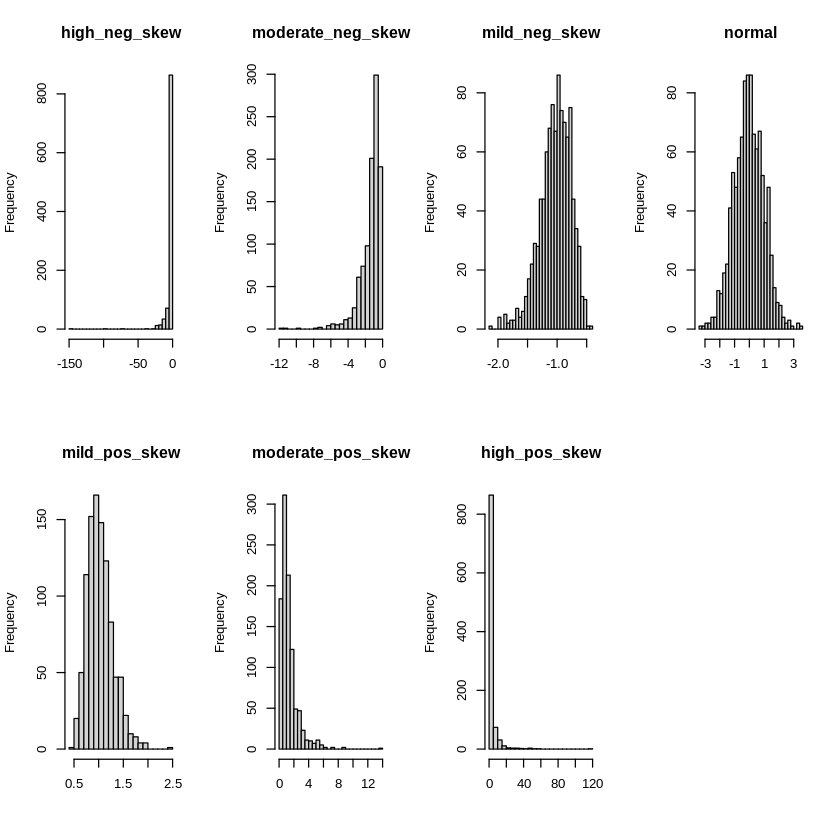

In [ ]:
skewed = read.csv("datasets/skewed.csv")
par(mfrow = c(2,4))
for(i in 1:7){hist(skewed[,i], xlab = "", main = colnames(skewed)[i], breaks = 25)}
par(mfrow = c(1,1))

## Example: Mean vs median
While the mean is the most commonly understood measure of average, median measures are most representative of an "average" person or event in highly skewed distributions. These include things such as employee wages, since there are a small number of people earning very high salaries while there are many people earning low to medium salaries.

The figure below is from [Australian Bureau of Statistics – Average Earnings Guide](https://www.abs.gov.au/statistics/understanding-statistics/guide-labour-statistics/earnings-guide/average-earnings-guide), showing the median and average weekly earnings of employees in Australian.

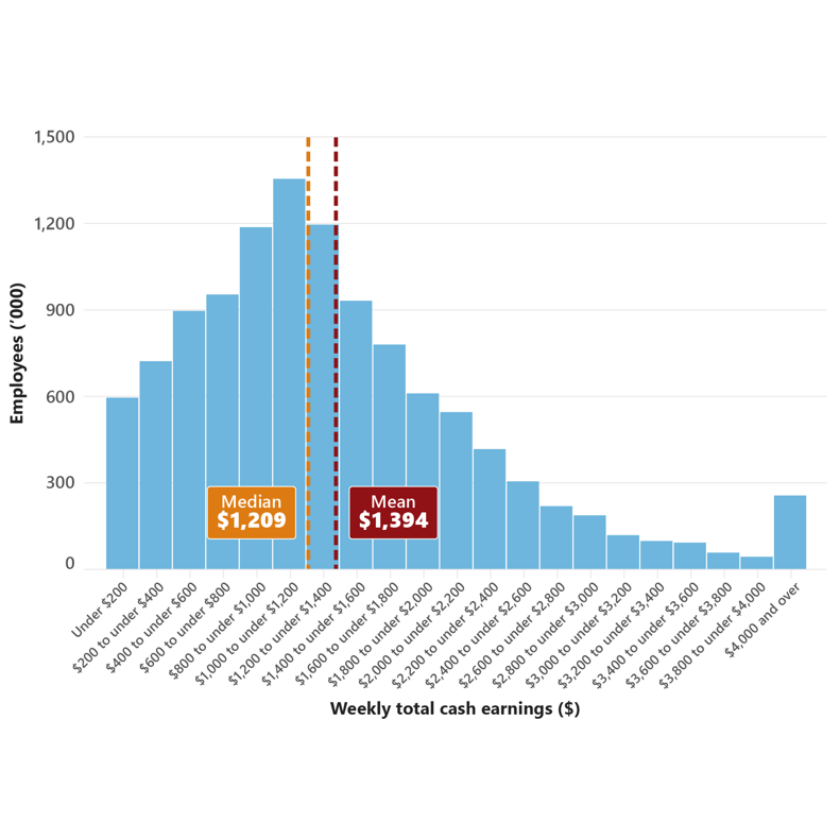

In [ ]:
# You can just run the code box to see it
# don't worry about understanding the code, we're just telling R where the figure is located, then using a command to display the image
img = readPNG("figures/abs_earning.png")
grid.raster(img)

In practice, positive skewness is more commonly observed than negative skewness. For example, the weekly earnings above are positively skewed, as are house prices.

#### **Exercise**

Provide a real-world example that exhibits negative skewness.


<details>
<summary>▶️ Click to show the solution</summary>

It would be quite concerning if the age at death were positively skewed—that is, if most people died young and only a few lived to an old age.

</details>

## Correlation
We can calculate correlation between datasets in R. For example, let's consider the coffee consumption over a fortnight. We might suppose that it is related to the amount the student surveyed slept each night. We can test this using the `cor()` function in R, which takes in two numeric vectors.

Try this below and interpret the result means.

In [16]:
coffee_consumption <- c(1, 4, 2, 2, 3, 1, 4, 0, 9, 1, 3, 2, 4, 1)
hours_slept <- c(7, 3, 6, 5, 4, 10, 7, 6, 0, 6, 12, 4, 2, 7)

# your code here
cor(coffee_consumption, hours_slept)

[1] -0.5888633

<details>
<summary>▶️ Click to show the solution</summary>

```r
cor(coffee_consumption, hours_slept)
```

We can see that there is a negative correlation. This means that coffee consumption goes down as number of hours of sleep goes up and vice versa. If you're a person who drinks coffee after a bad night's sleep, this logic makes perfect sense!

</details>

## **Workshop Questions**

#### **Warm-up**
Using the coffee consumption dataset, verify the results you found earlier: mean, median, variance, standard deviation, range, IQR, and create a boxplot and a histogram to see any patterns.

What measure of centrality is most appropriate for this dataset? What measure of dispersion? Is there any skew, and if so, is it positive or negative?

In [ ]:
# reminder: the c() command creates a vector
coffee_consumption <- c(1, 4, 2, 2, 3, 1, 4, 0, 9, 1, 3, 2, 4, 1)

### **EPA Fuel Economy Dataset**

A dataset containing information on over 13,500 cars sold in the US from 2010 to 2020, including measurements and characteristics related to vehicle fuel economy and specifications. Data sourced from the [US Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml).

| Variable | Description                                    |
|----------|------------------------------------------------|
| `city`   | EPA measured fuel economy in miles per gallon (city driving) |
| `hwy`    | EPA measured fuel economy in miles per gallon (highway driving) |
| `cyl`    | Number of cylinders in the engine              |
| `disp`   | Engine displacement (litres)                    |
| `drive`  | Vehicle drivetrain layout (e.g., FWD, RWD, AWD) |
| `make`   | Vehicle manufacturer name                       |
| `model`  | Vehicle model name                              |
| `trans`  | Transmission type (manual or automatic)        |
| `year`   | Vehicle model year                              |


In [ ]:
epa_data = read.csv("./datasets/epa_data.csv")
str(epa_data)

'data.frame':	13569 obs. of  9 variables:
 $ city : int  16 15 16 19 19 19 19 19 19 19 ...
 $ hwy  : int  24 22 22 27 29 24 26 27 29 24 ...
 $ cyl  : int  8 8 8 4 4 4 4 4 4 4 ...
 $ disp : num  5 5 5 2 2 2.4 2.4 2 2 2.4 ...
 $ drive: chr  "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" ...
 $ make : chr  "Jaguar" "Jaguar" "Jaguar" "Pontiac" ...
 $ model: chr  "XK" "XK" "XK Convertible" "Solstice" ...
 $ trans: chr  "Automatic" "Automatic" "Automatic" "Automatic" ...
 $ year : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


### **Question 1**

What is the mean and median city fuel economy for cars in the epa_data set? What is the mean and median for engine displacement?

**Hint**: Use `na.rm = TRUE` option in `mean` and `median` to avoid errors caused by missing values.

### **Question 2**

Compute the variances and standard deviations for EPA city and highway mileage. Use the empirical rule to interpret the results. Is the empirical rule accurate here?

We've written a custom commmand `empiricalRuleGaussian()` that takes in numeric vectors that can help you visualise the empirical rule.

### **Question 3**

Compute the median and interquartile ranges for EPA city and highway mileage. Then, create side-by-side boxplots to visually compare city and highway mileage.


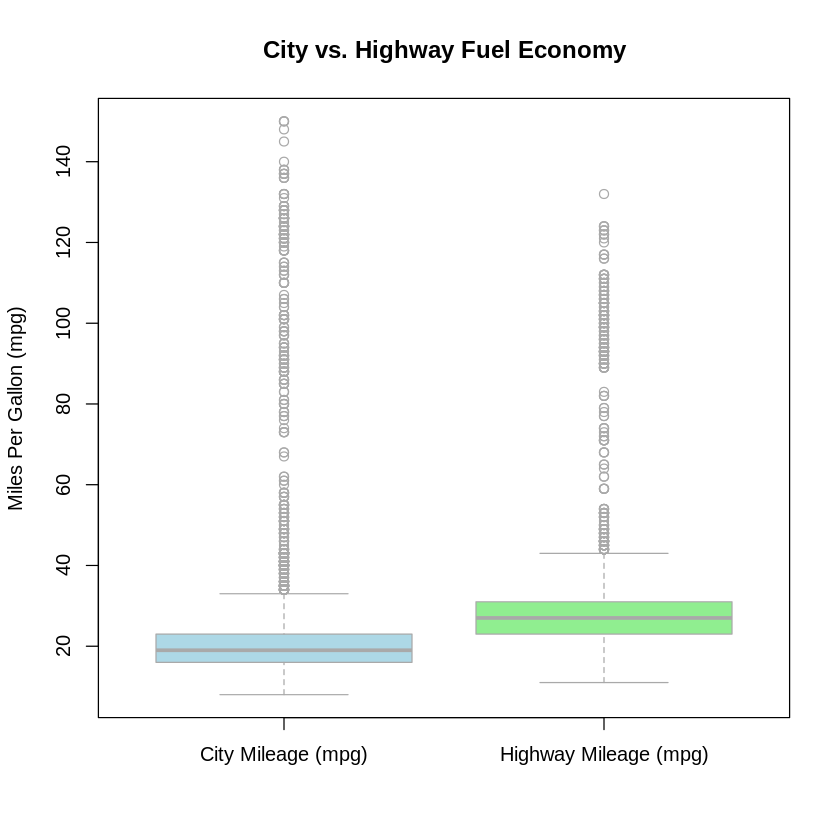

In [ ]:
# Calculate median and IQR for city mileage
median_city <- median(epa_data$city, na.rm = TRUE)
iqr_city <- IQR(epa_data$city, na.rm = TRUE)

# Calculate median and IQR for highway mileage
median_hwy <- median(epa_data$hwy, na.rm = TRUE)
iqr_hwy <- IQR(epa_data$hwy, na.rm = TRUE)

# Create side-by-side boxplots using base R
boxplot(epa_data$city, epa_data$hwy,
        names = c("City Mileage (mpg)", "Highway Mileage (mpg)"),
        main = "City vs. Highway Fuel Economy",
        ylab = "Miles Per Gallon (mpg)",
        col = c("lightblue", "lightgreen"),
        border = "darkgray",
        outline = TRUE) # Show outliers

### **Question 4**
What is the correlation between the city and highway mileage? Write a sentence or two interpreting what this means.